<a href="https://colab.research.google.com/github/LucioFassarella/curso_CQ/blob/main/PIIC_Algoritmo_Deutsch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmo de Deutsch-Jozsa**

---

<font color = "yellow">**Qiskit**:</font>
*   [Python's Instalation](https://pypi.org/project/qiskit/)
*   [IBM Quantum cloud](https://quantum.cloud.ibm.com/)
    *   [Qiskit connect](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started) (IBM Runtime Service)
       *   [Getting Started](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started)
*   [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
    *   [Qiskit Circuit Library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
    *   [Qiskit Gates Tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)
    *   [List of Quantum Logic Gates](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates)

[<font color="yellow">**Execution modes**</font>](https://quantum.cloud.ibm.com/docs/en/guides/execution-modes)
*	[Choose the execution mode](https://quantum.cloud.ibm.com/docs/en/guides/choose-execution-mode)
*   [Single Job](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples#estimator-examples)
*	[Batch mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-batch)
*	[Section mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-session)
*	[Primitives examples](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples)


[<font color="yellow">**Local simulators**</font>](https://quantum.cloud.ibm.com/docs/en/migration-guides/local-simulators)




# Algoritmo de Deutsch

O problema que o Algoritmo de Deutsch resolve é o de determinar se uma função de {0,1} em {0,1} é constante ou não-constante (balanceada).

$$
f: \left\lbrace 0,1 \right\rbrace \rightarrow \left\lbrace 0,1 \right\rbrace
$$

Para construir e executar o algoritmo, precisamos de uma implementação quântica de $f$, que em geral tem a seguinte forma:

$$
U_f : | x \rangle | y \rangle = | x \rangle | y \oplus f(x) \rangle
$$

O circuito de Deutsch:
<center><img align = "center" src="https://drive.google.com/uc?export=view&id=1hJJwXURWQqZ9aHhbIGCmwHM-UDN6tAbH" alt="grafo" width="500"></center>

O operador do circuito de Deutsch é dado po:

$$
\textbf{O} := (H_0 I_1)U_f(H_0 H_1)(X_0X_1) = (H \otimes I)U_f(H \otimes H)(X\otimes X)
$$

A ação do operador $\textbf{O}$ no estado inicial da base computacional $ | 0 \rangle | 0 \rangle$:

$$
\begin{split}
 \textbf{O} | 0 \rangle | 0 \rangle &= (H \otimes I)U_f(H \otimes H)(X\otimes X) | 0 \rangle | 0 \rangle\\
 &= (H \otimes I)U_f(H \otimes H) | 1 \rangle | 1 \rangle\\
 &= \frac{1}{2}(H \otimes I)U_f(| 0 \rangle - | 1 \rangle) (| 0 \rangle  - | 1 \rangle)\\
 &= \frac{1}{2}(H \otimes I)U_f(| 0\rangle | 0 \rangle - | 0\rangle |1 \rangle - | 1\rangle |0 \rangle  + | 1\rangle |1 \rangle)\\
 &= \frac{1}{2}(H \otimes I)(| 0\rangle | 0 \oplus f(0) \rangle - | 0\rangle |1\oplus f(0)  \rangle - | 1\rangle |0 \oplus f(1)  \rangle  + | 1\rangle |1 \oplus f(1) \rangle)\\
 &= \frac{1}{2\sqrt{2}}\left\lbrack (| 0\rangle + |1\rangle)| 0 \oplus f(0) \rangle - (| 0\rangle + |1\rangle) |1\oplus f(0)  \rangle - (| 0\rangle - |1\rangle) |0 \oplus f(1)  \rangle  +(| 0\rangle - |1\rangle) |1 \oplus f(1) \rangle \right\rbrack \\
 &= \frac{1}{2\sqrt{2}}\left\lbrack \ | 0\rangle( | 0 \oplus f(0) \rangle -  |1\oplus f(0)  \rangle -  |0 \oplus f(1)  \rangle  +|1 \oplus f(1) \rangle ) + \right. \\
 &\ \ \ \ \ \ \ \ \ \ \ + \left. |1\rangle (| 0 \oplus f(0) \rangle - |1\oplus f(0)  \rangle + |0 \oplus f(1)  \rangle  - |1 \oplus f(1) \rangle )\right\rbrack.\\
  &= \left\lbrace
  \begin{array}{ll}
  \frac{(-1)^{f(0)}}{\sqrt{2}}|1\rangle (| 0 \rangle - |1 \rangle) &, \text{caso}\ f\ \text{constante};\\
  \frac{(-1)^{f(0)}}{\sqrt{2}}|0\rangle (| 0 \rangle - |1 \rangle) &, \text{caso}\ f\ \text{balanceada}.
  \end{array}
  \right.
 \end{split}
$$

Para programar o algoritmo Deutsch, falta apenas construir as implementações da função $f$.

*   **Caso 1**: $f$ constante igual a $0$:  $f(0) = 0,\ f(1)=0$.

Nesse caso, $U_f$ atua como a identidade:
$$
U_f = I \otimes I.
$$

*   **Caso 2**: $f$ constante igual a $1$: $f(0) = 1,\ f(1)=1$.

Nesse caso, $U_f$ atua como a porta $X$ (NOT) no segundo qubit:
$$
U_f = I \otimes X.
$$

*   **Caso 3**: $f$ balanceada (identidade): $f(0) = 0,\ f(1)=1$.

Nesse caso, $U_f$ atua no segundo qubit como a porta $X$ controlada pelo primeiro qubit (CNOT):
$$
U_f = X^{0\rightarrow 1}_1.
$$

*   **Caso 4**: $f$ balanceada: $f(0) = 1,\ f(1)=0$.

Nesse caso, $U_f$ atua no segundo qubit como a porta $X$ controlada pelo primeiro qubit (CNOT), com o acionamento definido pelo valor $0$:
$$
U_f = X^{0\rightarrow 1}_0.
$$

# Qiskit: Instalação

In [ ]:
!pip install qiskit -U
!pip install qiskit_aer -U
!pip install qiskit-ibm-runtime -U

!pip install matplotlib
!pip install pylatexenc

import qiskit
qiskit.__version__

'2.2.2'

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Conecção com a IBM

token_privado = "" # <-- Inserir token privado na IBM
instance_do_projeto = "" # <-- Inserir instance do projeto

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token = token_privado,
    instance = instance_do_projeto
    )

## Save account to disk and save it as the default.
#QiskitRuntimeService.save_account(channel="ibm_cloud", token="<IBM Cloud API key>", instance="<IBM Cloud CRN>", name="account-name", set_as_default=True)

## Load the saved credentials
#service = QiskitRuntimeService(name="account-name")

qiskit_runtime_service._discover_account:WARNING:2025-10-27 17:38:43,201: Loading account with the given token. A saved account will not be used.


In [ ]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

## Métodos Primitivos

In [ ]:
def qiskit_sampler(circuito_com_medidas, shots = None, backend = None):
    '''
    Método para executar o Sampler
    >>> O Sampler realiza medidas em circuitos quânticos e retorna a contagem de qubits.
        A partir dos resultados do Sampler, podemos estimar as probabilidade de cada resultado.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        backend  : backend para rodar o Sampler

    Saída:
        resultado do Sampler

    Observação: os resultados do Sampler são rotulados pelo nomes dos registros clássicos.
                Para um circuito com medidas definidas por 'measure_all', o rótulo é 'meas'.
                Para circuitos com medidas definidas de início sem denominação explícita,
                os rótulos são 'c', 'c1', 'c2', etc.

    Tutorial do Sampler: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/sampler-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import SamplerV2 as Sampler

    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    from qiskit.transpiler import generate_preset_pass_manager
    pm = generate_preset_pass_manager(optimization_level=2, backend = backend)

    # Transpilação

    isa_circuitos = pm.run(circuito_com_medidas)

    if shots is None:
        shots = 2**10
    else:
        shots = shots

    sampler = Sampler(backend)
    job = sampler.run([(isa_circuitos, )], shots = shots)
    result = job.result()
    counts = result[0].data['c'].get_counts()

    return counts, result

In [ ]:
def qiskit_estimator(circuito_sem_medidas, hamiltoniano, precisao = None, backend = None):
    '''
    Método para executar o Estimator
    >>> O Estimator estima valores esperados de circuitos e observáveis.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        hamiltoniano (SparsePauliOp): hamiltoniano a ser medido
        precisao (float): precisão do resultado
        backend  : backend para rodar o Estimator

    Saída:
        resultado do Estimator

    Tutorial do EstimatorV2: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/estimator-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import EstimatorV2 as Estimator
    from qiskit.transpiler import generate_preset_pass_manager

    # Use the existing service object
    # service = QiskitRuntimeService()
    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    if precisao is None:
        precisao = 2**(-10)
    else:
        precisao = precisao

    # Transpilação

    pm = generate_preset_pass_manager(backend = backend, optimization_level=1)
    isa_circuito = pm.run(circuito_sem_medidas)
    isa_hamiltoniano = hamiltoniano.apply_layout(isa_circuito.layout)

    # Estimator:

    estimator = Estimator(mode=backend)

    # Job
    job = estimator.run([(isa_circuito, isa_hamiltoniano, )])
    pub_result = job.result()[0]

    return pub_result.data.evs

# Algoritmo de Deutsch

In [ ]:
'''
Oráculos
'''

def OraculoDeutsch_circuito(x = 'int', y = 'int'):
    '''
    Método que implementa o oráculo de cada função f: {0,1} -> {0,1}.
    Recebe um par de números binários x,y = 0,1 e retorna um circuito que implementa
    o oráculo da função f_{xy}:

        x,y = 0,1 -> f_{xy}(0) = x, f_{xy}(1) = y

        00 -> f_{00}(0) = 0, f{00}(1) = 0
        10 -> f_{10}(0) = 1, f{10}(1) = 0
        01 -> f_{01}(0) = 0, f{01}(1) = 1
        11 -> f_{11}(0) = 1, f{11}(1) = 1

    Input:
        x: 'int' (0, 1)
        y: 'int' (0, 1)

    Output:
        circuito que implementa o unitário
        |z0> |z0> --> |z0>|z1 + f(z0)>

    '''

    qc = QuantumCircuit(2, name = "oraculo")

    if x == 0 and y == 0:
        return qc
    elif x == 1 and y == 0:
        qc.x(0)
        qc.cx(0,1)
        qc.x(0)
        return qc
    elif x == 0 and y == 1:
        qc.cx(0,1)
        return qc
    elif x == 0 and y == 1:
        qc.x(1)
        return qc
    else:
        return print("Erro de input: A entrada do oráculo deve ser (0,0), (0,1), (1,0), (1,1).")

# def OraculoDeutsch_circuito2(n = 'int'): # É preciso verificar os unitários!!!!
#     '''
#     Método que implementa o oráculo de cada função f: {0,1} -> {0,1}.
#     Recebe um número n (= 0, 1, 2, 3) e retorna um circuito que implementa
#     o oráculo da função f_n:

#         n = y.2^1 + x.2^0 (x,y = 0, 1) -> f_n(0) = x, f_n(1) = y

#         0 -> f(0) = 0, f(1) = 0
#         1 -> f(0) = 1. f(1) = 0
#         2 -> f(0) = 0, f(1) = 1
#         3 -> f(0) = 1, f(1) = 1

#     Input:
#         n ('int'): 0, 1, 2, 3.

#     Output:
#         circuito que implementa o unitário
#         |x>|y> -> |x>|y + f(x)>

#     '''

#     U = []

#     U.append([
#         [1,0,0,0],
#         [0,1,0,0],
#         [0,0,1,0],
#         [0,0,0,1]
#     ])

#     U.append([
#         [1,0,0,0],
#         [0,0,0,1],
#         [0,0,1,0],
#         [0,1,0,0]
#     ])

#     U.append([
#         [1,0,0,0],
#         [0,1,0,0],
#         [0,0,0,1],
#         [0,0,1,0]
#     ])

#     U.append([
#         [0,1,0,0],
#         [1,0,0,0],
#         [0,0,0,1],
#         [0,0,1,0]
#     ]
#     )

#     qc = QuantumCircuit(2, name = 'oráculo')

#     if 0 <= n <= 3:
#         return qc.unitary(U[n],[0,1])
#     else:
#         return print("Erro de input: A entrada do oráculo deve ser 0, 1, 2 ou 3.")

# def OraculoDeutsch_unitario(n = 'int'):  # É preciso verificar os unitários!!!!
#     '''
#     Método que implementa o oráculo de cada função f: {0,1} -> {0,1}.
#     Recebe um número n (= 0, 1, 2, 3) e retorna um operador unitário que implementa
#     o oráculo da função f_n:

#         n = y.2^1 + x.2^0 (x,y = 0, 1) -> f_n(0) = x, f_n(1) = y

#         0 -> f(0) = 0, f(1) = 0
#         1 -> f(0) = 1. f(1) = 0
#         2 -> f(0) = 0, f(1) = 1
#         3 -> f(0) = 1, f(1) = 1

#     Input:
#         n ('int'): 0, 1, 2, 3.

#     Output:
#         circuito que implementa o unitário
#         |x>|y> -> |x>|y + f(x)>

#     '''

#     import qiskit.quantum_info as qi

#     U = []

#     U.append([
#         [1,0,0,0],
#         [0,1,0,0],
#         [0,0,1,0],
#         [0,0,0,1]
#     ])

#     U.append([
#         [1,0,0,0],
#         [0,0,0,1],
#         [0,0,1,0],
#         [0,1,0,0]
#     ])

#     U.append([
#         [1,0,0,0],
#         [0,1,0,0],
#         [0,0,0,1],
#         [0,0,1,0]
#     ])

#     U.append([
#         [0,1,0,0],
#         [1,0,0,0],
#         [0,0,0,1],
#         [0,0,1,0]
#     ]
#     )

#     if 0 <= n <= 3:
#         return qi.Operator(U[n])
#     else:
#         return print("Erro de input: A entrada do oráculo deve ser 0, 1, 2 ou 3.")

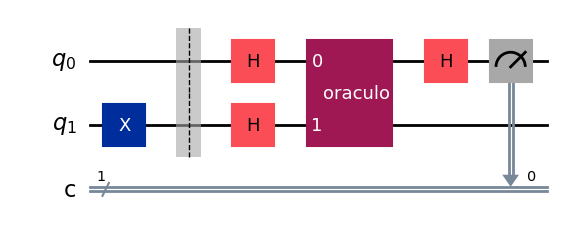

Resultado da medida: {'1': 1}
Função balanceada


In [ ]:
# Circuito do oráculo
oraculo = OraculoDeutsch_circuito(1,0)

# Circuito de Deutsch-Jozsa
qc = QuantumCircuit(2,1)
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.append(oraculo,[0,1]) # ação do oráculo
qc.h(0)
qc.measure(0,0)
display(qc.draw('mpl'))
medida = qiskit_sampler(qc, shots = 1)

print(f"Resultado da medida: {medida[0]}")

# Print do resultado

for key in medida[0].keys():
    if key == '0':
        print("Função constante")
    elif key == '1':
        print("Função balanceada")
    else:
        print("Erro!")